## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
# import the math module 
import math
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
rows = df.shape[0]
print('b. Use the cell below to find the number of rows in the dataset:',rows)

b. Use the cell below to find the number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [5]:
n_unique = df['user_id'].nunique()
print('c. The number of unique users in the dataset :',n_unique)

c. The number of unique users in the dataset : 290584


d. The proportion of users converted.

In [6]:
u_converted = 100*df.converted.sum()/rows
print('d. The proportion of users converted : %.2f' %(u_converted))

d. The proportion of users converted : 11.97


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df1 = df[(df['group'] == 'treatment') == (df['landing_page'] == 'new_page')]
df1.shape

(290585, 5)

In [8]:
df2 = df[~(df['group'] == 'treatment') == (df['landing_page'] == 'new_page')]
df2.shape

(3893, 5)

In [9]:
print('e. The number of times the new_page and treatment don\'t match :',df2.shape[0])

e. The number of times the new_page and treatment don't match : 3893


f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df[(df['group'] == 'treatment') == (df['landing_page'] == 'new_page')]
df2.shape

(290585, 5)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
n_unique = df2['user_id'].nunique()
print('a. How many unique user_ids are in df2\? ',n_unique)

a. How many unique user_ids are in df2\?  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
id_duplicatedd = df2[df2['user_id'].duplicated()]

In [16]:
id_duplicatedd

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
id_duplicatedd_n = id_duplicatedd['user_id'][2893]

In [18]:
print('c. What is the row information for the repeat user_id? ', id_duplicatedd_n)

c. What is the row information for the repeat user_id?  773192


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
user_id_dup = df2[df2["user_id"] == 773192]
user_id_dup

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
print('d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2. ', user_id_dup)

d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.        user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
p_converted = df2['converted'].mean()
print('a. What is the probability of an individual converting regardless of the page they receive? %.4f' %(p_converted))

a. What is the probability of an individual converting regardless of the page they receive? 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
p_converted_control = df2[df2['group'] == 'control']['converted'].mean()
print('b. Given that an individual was in the control group, what is the probability they converted? %.4f' %(p_converted_control))

b. Given that an individual was in the control group, what is the probability they converted? 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
p_converted_treatment = df2[df2['group'] == 'treatment']['converted'].mean()
print('c. Given that an individual was in the treatment group, what is the probability they converted? %.4f' %(p_converted_treatment))

c. Given that an individual was in the treatment group, what is the probability they converted? 0.1188


d. What is the probability that an individual received the new page?

In [24]:
p_new_page = (df2.landing_page == 'new_page').mean()

In [25]:
print('d. What is the probability that an individual received the new page? %.4f' %(p_new_page))

d. What is the probability that an individual received the new page? 0.5001


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is no sufficient evidence to say that the new_page leads to more conversions.
p_new_page  = 0.5001 (half new page half old page i.e. "fair coin")
p_converted = 0.1196 (too low to be Considered)**

<a id='ab_test'></a>
### Part II - A/B Test

**Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.** 

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


**`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?**

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**NULL Hypothesis, the old page is better or equel to new page:**

 **$H_{0}$ : ($P_{old}$ - $P_{new}$) => 0**

**Alternative Hypothesis, the new page is better old page:**

**$H_{1}$ : ($P_{new}$ - $P_{old}$) > 0**

**Confidence interval = 95%, N >>> 30, a = 1.96**

**`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the** **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
pnew = df2['converted'].mean()
print('a. What is the conversion rate for  𝑝𝑛𝑒𝑤  under the null? %.5f\n **assuming pnew and pold are equal' %(pnew))

a. What is the conversion rate for  𝑝𝑛𝑒𝑤  under the null? 0.11960
 **assuming pnew and pold are equal


<br><br> 
b. What is the **conversion rate** for $p_{old}$ under the null? 

In [27]:
pold = df2['converted'].mean()
print('b. What is the conversion rate for  𝑝old  under the null? %.5f\n **assuming pnew and pold are equal' %(pold))

b. What is the conversion rate for  𝑝old  under the null? 0.11960
 **assuming pnew and pold are equal


<br><br>c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
n_new = df2[df2['group'] == "treatment"].count()['user_id']
print('c. What is n_new, the number of individuals in the treatment group? \n%d' %(n_new))

c. What is n_new, the number of individuals in the treatment group? 
145311


d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2[df2['group'] == "control"].count()['user_id']
print('c. What is n_old, the number of individuals in the treatment group? \n%d' %(n_old))

c. What is n_old, the number of individuals in the treatment group? 
145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
newpage_converted = np.random.choice([0, 1], size=n_new, p=[(1 - pnew), pnew])
'%.4f'%(newpage_converted.mean())

'0.1183'

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
oldpage_converted = np.random.choice([0, 1], size=n_old, p=[(1 - pold), pold])
'%.4f'%(oldpage_converted.mean())

'0.1197'

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
'%.4f'%(newpage_converted.mean() - oldpage_converted.mean())

'-0.0014'

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
p_diffs = []
for i in range(10000):
    newpage_converted = np.random.choice([0, 1], size=n_new, p=[(1 - pnew), pnew])
    oldpage_converted = np.random.choice([0, 1], size=n_old, p=[(1 - pold), pold])
    p_diffs.append(newpage_converted.mean() - oldpage_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [34]:
# diff new - old based on our data
diff_data_new_old = p_converted_treatment - p_converted_control
'%.4f'%(diff_data_new_old)

'-0.0016'

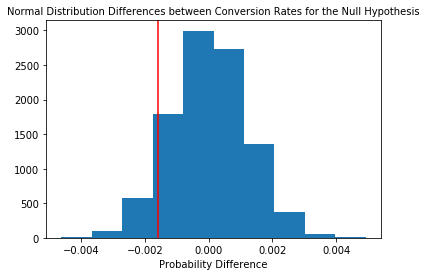

In [35]:
plt.hist(p_diffs);
plt.title("Normal Distribution Differences between Conversion Rates for the Null Hypothesis", fontsize=10)
plt.xlabel("Probability Difference", fontsize=10)
plt.axvline(diff_data_new_old, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
# diff new - old based on our data vs diff new - old based in sumulation
'%.4f'%((p_diffs >= diff_data_new_old).mean())

'0.9059'

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

What is this value called in scientific studies?
**p-value** 

- What does this value mean in terms of whether or not there is a difference between the new and old pages?

**A p value is used in hypothesis testing to help you support or reject the null hypothesis.** <br>
The p value is the evidence against a null hypothesis. <br> 
The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. <br>
in our case, in part j p-value = 0.9062 , too high for us to be able to reject the null hypothesis witch is sales of old paper is too much better than new one. <br>

`1.` Actual difference represents the difference between probability new page and old page, based on our data is -0.0016

`2.` simulated difference between probability new page and old page, based on our data is using 10000 simulated samples given as normal distribution.


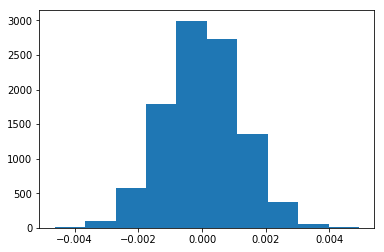

In [37]:
plt.hist(p_diffs);

`3.` In our case, The percentage of 90.5, too high for us to be able to reject the null hypothesis "within 68%".

`4.` another way to confirm the hypothesis

In [38]:
describe = df2.describe()['converted']
describe

count    290585.000000
mean          0.119597
std           0.324490
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

In [39]:
count = describe['count'].astype(int)
count

290585

In [40]:
variance = describe['std']*describe['std']
'%.4f'%variance

'0.1053'

In [41]:
CI = 1.96*math.sqrt(variance/count)
'%.4f'%CI

'0.0012'

In [42]:
abs(diff_data_new_old) <= CI

False

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()
n_old, n_new 

(145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [44]:
#Two-sample Proportion Hypothesis Testing
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print("z_score", z_score)
print("p_value", p_value)

z_score -1.31160753391
p_value 0.905173705141


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The value of the z-score tells you how many standard deviations you are away from the mean.<br> 
If a z-score is equal to 0, it is on the mean.<br> 
A positive z-score indicates the raw score is higher than the mean average.<br>  
For example, if a z-score is equal to +1, it is 1 standard deviation above the mean.<br> 
A negative z-score reveals the raw score is below the mean average.<br>  
For example, if a z-score is equal to -2, it is 2 standard deviations below the mean.<br> <br> 
**from t-table 1.31160753391 Confidence Interval between 80%-85%<br> <br> 

**in part j p-value = 0.9062 closer to p-value 0.9052 in part m**

**yes they agree and simillar to finding in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Because we have Binary Qualitative data we use Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [46]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'old_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-01 19:34 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1467  0.0000  -2.0197  -1.9879
old_page      0.0150    0.0114     1.3116  0.1897  -0.0074   0.0374
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value calculated here is 0.1897 using The logistic regression determines only two possible outcomes. <br> less than 0.9052, due to he intercept added to equation**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding additional information about users could reveal hidden value of the new version of the page for specific group of the users, but also it could cause disadvantage and bais in data if there any correlation between additional information**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
df4 = pd.read_csv('countries.csv')
df_n = df4.set_index('user_id').join(df2.set_index('user_id'), how='inner').reset_index()
df_n.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0
1,630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0
2,630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1
3,630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0
4,630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Create additional columns

In [49]:
df_n['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [50]:
df_n['US'] = df_n.country.str.lower() == 'us'

In [51]:
df_n['CA'] =((df_n['country'] == 'CA')).astype(bool)

In [52]:
df_n[['US', 'UK', 'CA']] = pd.get_dummies(df_n['country'])

In [53]:
df_n.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,US,CA,UK
0,630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0
1,630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0
2,630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,1,0
3,630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0
4,630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0


In [54]:
df_n['intercept'] = 1
log_mod = sm.Logit(df_n['converted'], df_n[['US', 'UK', 'intercept', 'ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-01 19:35 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
US           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
==================================================================

"""

we do not have sufficient evidence to suggest that the new page results in more conversions than the old one and reject the NULL hypothesis.<br>
"The p-values for the countries are above 0.05"

In [55]:
df_n['US_ab_page'] = df_n['US'] * df_n['ab_page']
df_n['CA_ab_page'] = df_n['CA'] * df_n['ab_page']

In [56]:
df_n.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,US,CA,UK,US_ab_page,CA_ab_page
0,630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,0,1
1,630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,0,1
2,630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,1,0,0,0
3,630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,0,1
4,630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,0,1


In [59]:
log_mod = sm.Logit(df_n['converted'], df_n[['intercept', 'ab_page', 'US', 'CA', 'US_ab_page', 'CA_ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-01 19:53 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
CA            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
US_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
CA_ab_page   -0.0314    0.0266    -1.1811  0.2375  -0.0835   0.0207
==================================================================

"""

<a id='conclusions'></a>
## Conclusions

- we do not have sufficient evidence to suggest that the new page results in more conversions than the old one and reject the NULL hypothesis, because all p-values larger than 0.05.

- i think the company should stick to the old one, and extend the test duration according to different testing methods used in this analysis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0